In [14]:
! pip install folium

In [15]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
df = pd.read_excel('/content/Group Project Data-SFD Data-Toronto Police.xlsx')
df


,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [18]:
df.describe()

,X,Y,OBJECTID,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DEATH,INJURIES,LONG_WGS84,LAT_WGS84
count,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000
mean,-79.481115,43.244138,2854.000000,2014.460662,187.198178,15.901174,12.099527,0.122481,0.488172,-79.481115,43.244138
std,0.640212,4.532671,1647.613324,5.468803,100.269326,8.819631,8.685588,0.349599,0.779148,0.640212,4.532671
min,-85.488744,0.000000,1.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-85.488744,0.000000
25%,-79.513346,43.676604,1427.500000,2010.000000,106.000000,8.000000,3.000000,0.000000,0.000000,-79.513346,43.676604
50%,-79.439740,43.720796,2854.000000,2016.000000,192.000000,16.000000,15.000000,0.000000,0.000000,-79.439740,43.720796
75%,-79.328082,43.755306,4280.500000,2019.000000,268.000000,23.000000,20.000000,0.000000,1.000000,-79.328082,43.755306
max,-79.122053,43.838274,5707.000000,2022.000000,366.000000,31.000000,23.000000,3.000000,24.000000,-79.122053,43.838274


In [19]:
# no missing value in the data
df.isnull().sum()

X                    0
Y                    0
OBJECTID             0
EVENT_UNIQUE_ID      0
OCC_DATE             0
OCC_YEAR             0
OCC_MONTH            0
OCC_DOW              0
OCC_DOY              0
OCC_DAY              0
OCC_HOUR             0
OCC_TIME_RANGE       0
DIVISION             0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

## Data Cleaning
### Drop records with HOOD_158 being “NSA”, because those records have (0, 0) as coordinates and the neighbourhood are identified as ‘Not Specified Area'. Thus, no missing value imputation strategy should be used in this case to avoid creating noises in the data and compromising the accuracy of our result, forcing us to drop all those records.

### Then, we can group the records by their OCC_TIME_RANGE. Records with “Evening” and “Night” are classified as “Nighttime” events, and records with “Morning” and “Afternoon” are classified as “Daytime”.



In [20]:
# drop out possible dupicates
df.drop_duplicates(inplace=True)

In [21]:
# drop out unnecessary columns / features such as HOOD_140, NEIGHBOURHOOD_140, LONG_WGS84, LAT_WGS84 as
# they are irrelevant information to our tasks
df_clean = df.drop(columns=["OBJECTID", "EVENT_UNIQUE_ID" ,"HOOD_140", "NEIGHBOURHOOD_140", "LONG_WGS84", "LAT_WGS84"])
df_clean

,X,Y,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158
0,-79.234955,43.781528,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North
1,-79.618218,43.733547,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville
2,-79.518759,43.769157,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek
3,-79.378870,43.660665,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East
4,-79.212435,43.812075,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm
5703,-79.402702,43.643920,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place
5704,-79.196217,43.786621,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside
5705,-79.443993,43.658083,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove


In [22]:
# Drop records with HOOD_158 being “NSA”
df_clean = df_clean.loc[df_clean['HOOD_158'] != "NSA"]
df_clean

,X,Y,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158
0,-79.234955,43.781528,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North
1,-79.618218,43.733547,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville
2,-79.518759,43.769157,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek
3,-79.378870,43.660665,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East
4,-79.212435,43.812075,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm
5703,-79.402702,43.643920,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place
5704,-79.196217,43.786621,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside
5705,-79.443993,43.658083,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove


# Statistical Testing

#### Run correlations among variables to see if there is redundancy in the variables
  
  - Since high correlations among variables can contaminate the clustering algorithm and can have significant impact on the quality of the solution, high correlated pairs of features need to be identified


However, as the below result shown, none of the numeric features are highly correlated, implying that no further cleaning of the feature space is required

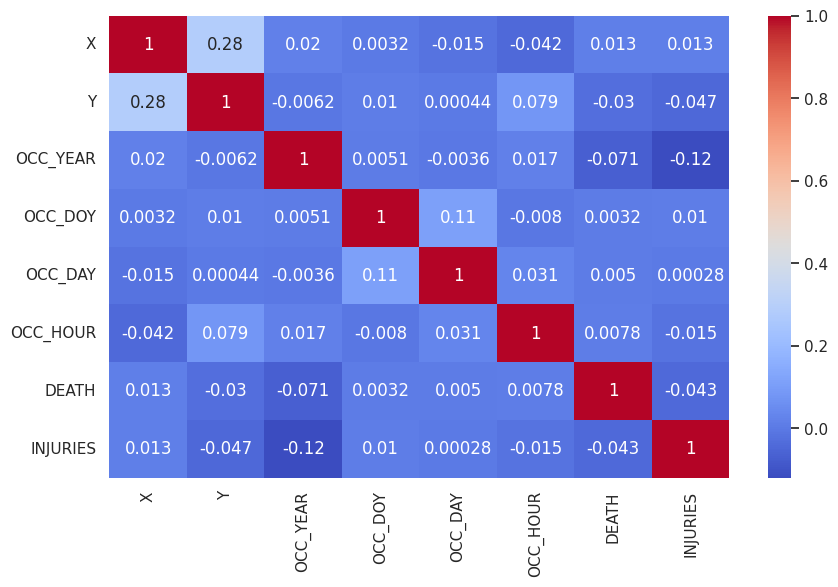

In [23]:
import seaborn as sns
# Correlation matrix heatmap
sns.set(rc={'figure.figsize':(10,6)})
corr_matrix = df_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Basic Analysis: Visualization

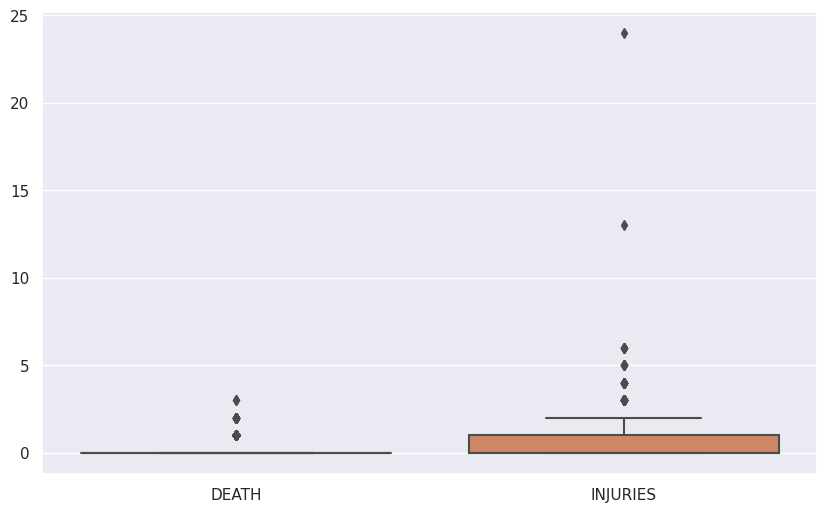

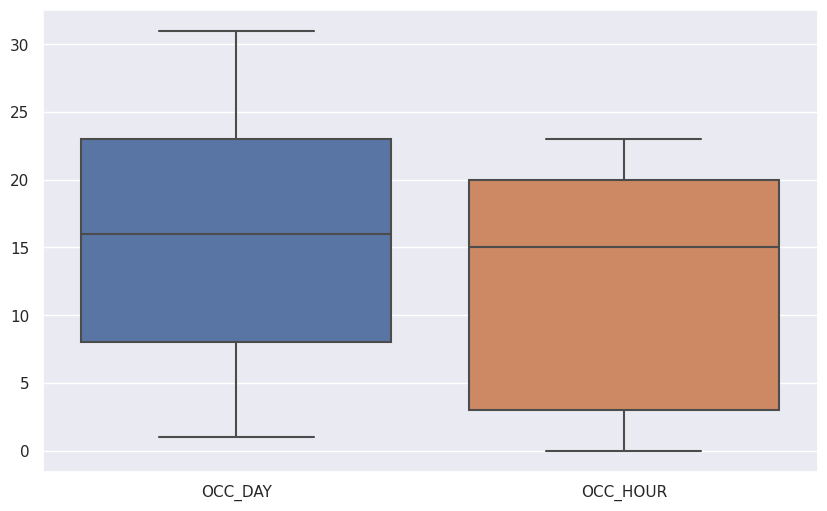

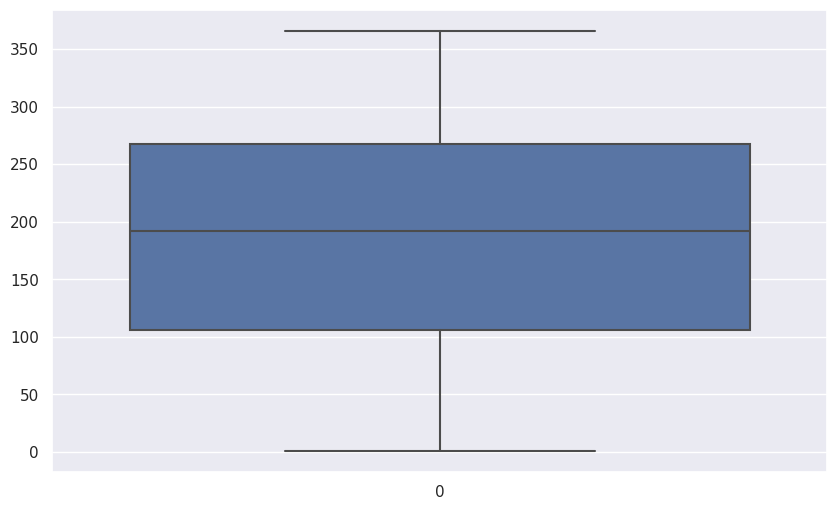

<Axes: >

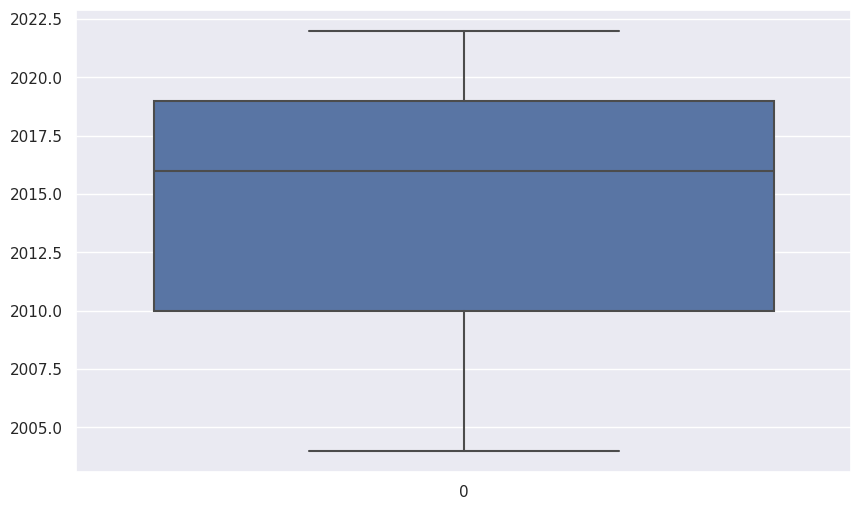

In [24]:
# outlier detection
# THOUGH the "injuries" feature seems to have many outliers, we should not drop those records as
# it is possible to have at most 25 people injuried in severe gunshot incident, meaning that
# dropping the outliers will actually cause us to lose insights in the data

sns.boxplot(df_clean[["DEATH", "INJURIES"] ])
plt.show()
sns.boxplot(df_clean[["OCC_DAY", "OCC_HOUR"] ])
plt.show()
sns.boxplot(df_clean["OCC_DOY"])
plt.show()
sns.boxplot(df_clean["OCC_YEAR"])

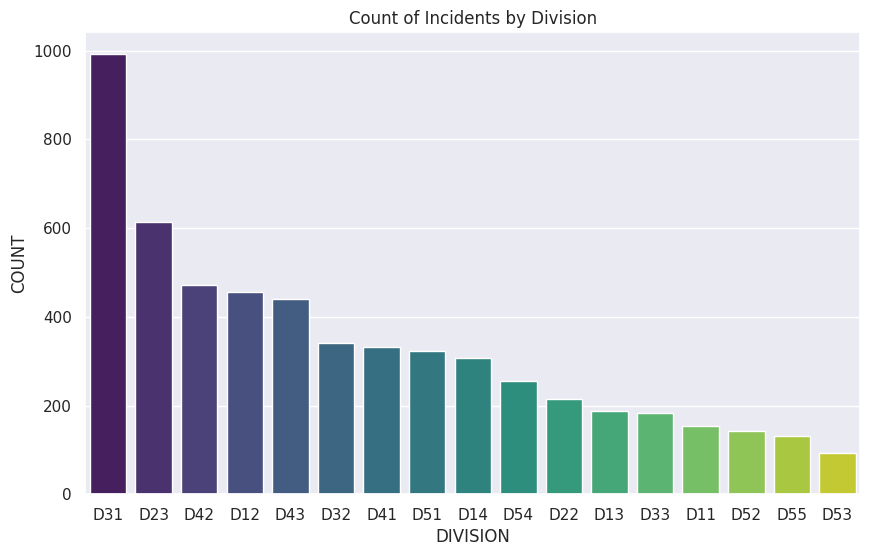

In [25]:
# visualization: count the incidents by 'division' -> Yisong, Jingze

# Count the number of incidents in each division
division_counts = df_clean['DIVISION'].value_counts().reset_index()

# Rename the columns for the plot
division_counts.columns = ['DIVISION', 'COUNT']

# Create a bar plot
sns.barplot(x = 'DIVISION', y = 'COUNT', data = division_counts, palette = 'viridis')
plt.title('Count of Incidents by Division')
plt.show()

In [26]:
# Plotted the first 500 records only for illustration purpose,
# where green point means no injuries or death involved in the incident,
# yellow points means having injuries but no death caused by the incident,
# and red points means having at least 1 death involved in the incident.

map_new=folium.Map(location=[df_clean['Y'].mean(), df_clean['X'].mean()], zoom_start=11)
portion = df_clean.head(500)
list_coor= portion[['NEIGHBOURHOOD_158','Y','X', 'DEATH', 'INJURIES']].values.tolist()
for i in list_coor:
    if i[3] > 0 :
        map_new.add_child(folium.Marker(location=[i[1],i[2]], popup=i[0],icon=folium.Icon(color='red')))
    elif i[4] > 0 :
        map_new.add_child(folium.Marker(location=[i[1],i[2]], popup=i[0],icon=folium.Icon(color='orange')))
    else :
        map_new.add_child(folium.Marker(location=[i[1],i[2]], popup=i[0],icon=folium.Icon(color='green')))

map_new

In [27]:
# Incident heatmap by death
# The warmer colors indicate higher number of incidents and/or higher number of deaths,
# and this graph can be zoomed in for more granular information as shown below.

from folium.plugins import HeatMap

list_coor= df_clean[['NEIGHBOURHOOD_158','Y','X', 'DEATH', 'INJURIES']].values.tolist()
map_obj = folium.Map(location=[df_clean['Y'].mean(), df_clean['X'].mean()], zoom_start=11)
lats_longs = df[['Y','X', 'DEATH']].values.tolist()

HeatMap(lats_longs).add_to(map_obj)

map_obj

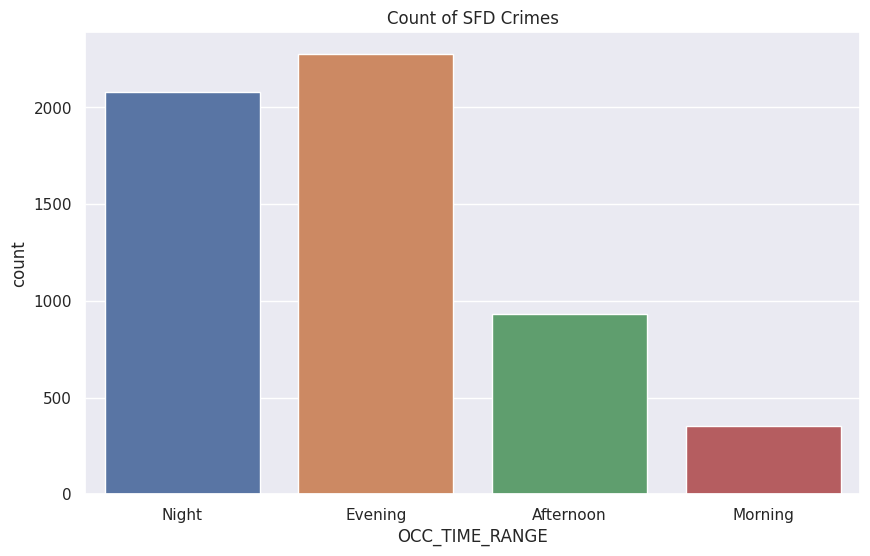

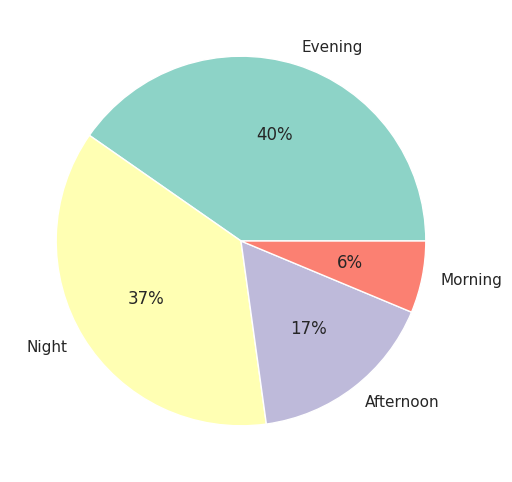

In [28]:
# Apparently we have more crimes being commited during night time than day time
palette_color=sns.color_palette("Set3")
sns.countplot(x=df_clean.OCC_TIME_RANGE, data = df_clean)
plt.title("Count of SFD Crimes")
plt.show()


plt.pie(df_clean['OCC_TIME_RANGE'].value_counts(), labels = df_clean['OCC_TIME_RANGE'].value_counts().index, colors = palette_color,
       autopct = '%.0f%%')

plt.show()


In [29]:
# group the records by their OCC_TIME_RANGE.
# Records with “Evening” and “Night” are classified as “Nighttime” events,
# and records with “Morning” and “Afternoon” are classified as “Daytime”.

df_night = df_clean.loc[(df_clean['OCC_TIME_RANGE'] == "Evening") | (df_clean['OCC_TIME_RANGE'] == "Night")]
df_night

,X,Y,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158
0,-79.234955,43.781528,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North
1,-79.618218,43.733547,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville
3,-79.378870,43.660665,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East
4,-79.212435,43.812075,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East
5,-79.318704,43.759919,2004/03/14 05:00:00+00,2004,March,Sunday,74,14,0,Night,D33,0,0,150,Fenside-Parkwoods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5701,-79.477146,43.709998,2022/06/23 04:00:00+00,2022,June,Thursday,174,23,0,Night,D12,0,0,29,Maple Leaf
5702,-79.362941,43.771764,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm
5703,-79.402702,43.643920,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place
5704,-79.196217,43.786621,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside


In [30]:
df_day = df_clean[(df_clean['OCC_TIME_RANGE'] == "Morning") | (df_clean['OCC_TIME_RANGE'] == "Afternoon")]
df_day

,X,Y,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158
2,-79.518759,43.769157,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek
7,-79.588530,43.738688,2004/09/08 04:00:00+00,2004,September,Wednesday,252,8,14,Afternoon,D23,0,0,2,Mount Olive-Silverstone-Jamestown
11,-79.589903,43.738802,2004/11/15 05:00:00+00,2004,November,Monday,320,15,17,Afternoon,D23,0,1,2,Mount Olive-Silverstone-Jamestown
13,-79.256513,43.730741,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,17,Afternoon,D41,1,0,124,Kennedy Park
20,-79.373917,43.653962,2004/09/11 04:00:00+00,2004,September,Saturday,255,11,16,Afternoon,D51,0,0,168,Downtown Yonge East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5687,-79.198740,43.746293,2022/03/28 04:00:00+00,2022,March,Monday,87,28,12,Afternoon,D43,0,1,140,Guildwood
5695,-79.465158,43.705940,2022/06/19 04:00:00+00,2022,June,Sunday,170,19,16,Afternoon,D13,1,0,31,Yorkdale-Glen Park
5696,-79.255781,43.736698,2022/09/21 04:00:00+00,2022,September,Wednesday,264,21,15,Afternoon,D41,1,0,138,Eglinton East
5697,-79.580198,43.754972,2022/02/12 05:00:00+00,2022,February,Saturday,43,12,17,Afternoon,D23,0,0,21,Humber Summit


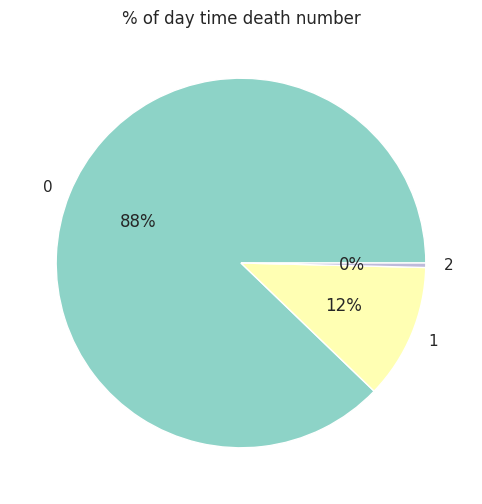

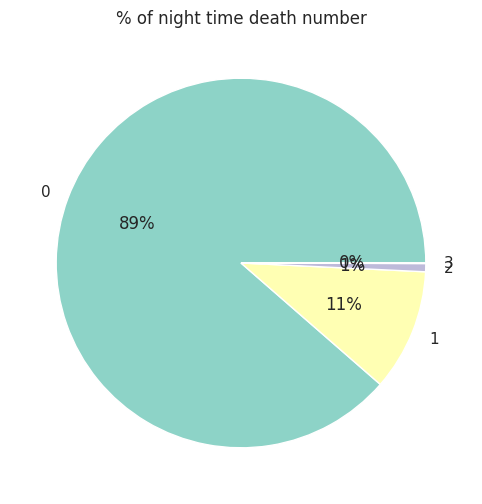

In [31]:
# Despite have more incidents during night time, the proportion of death in both day time and night time are about the same
plt.pie(df_day['DEATH'].value_counts(), labels = df_day['DEATH'].value_counts().index, colors = palette_color,
       autopct = '%.0f%%')
plt.title("% of day time death number")
plt.show()

plt.pie(df_night['DEATH'].value_counts(), labels = df_night['DEATH'].value_counts().index, colors = palette_color,
       autopct = '%.0f%%')
plt.title("% of night time death number")
plt.show()

Number of division is:  17


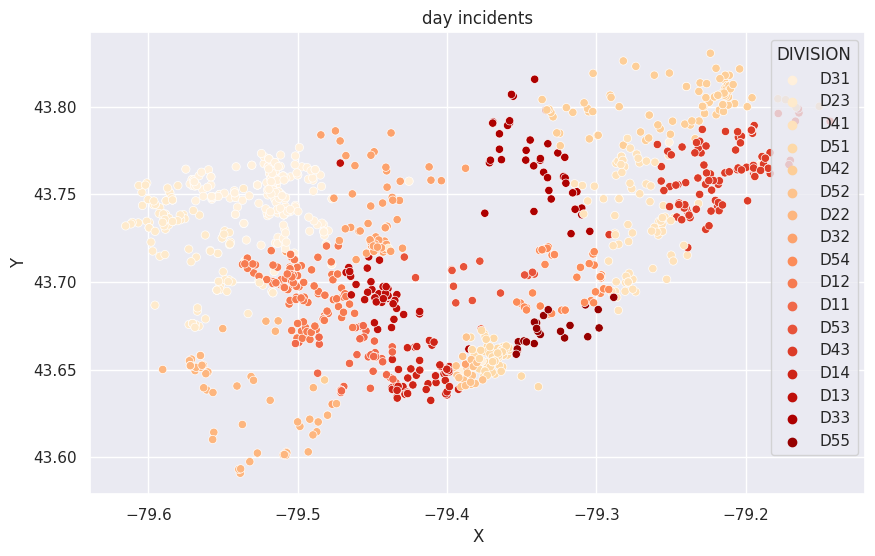

Text(0.5, 1.0, 'night incidents')

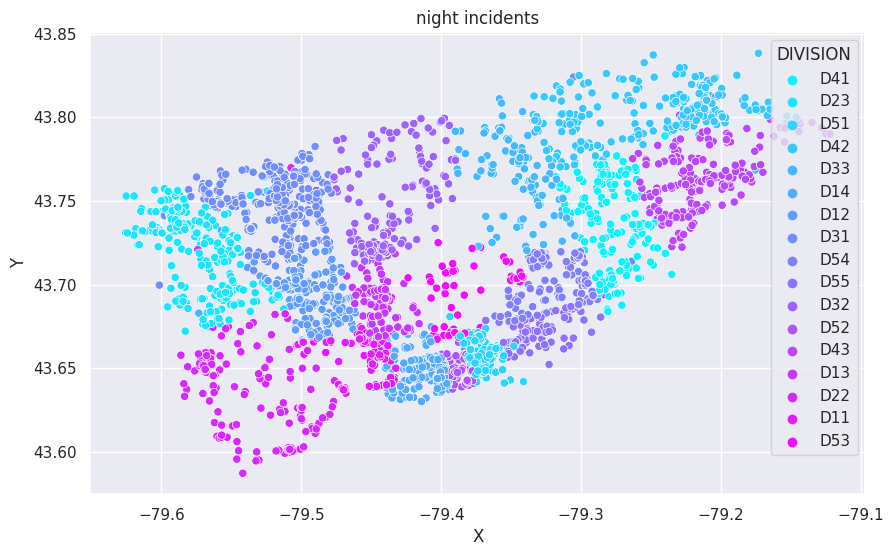

In [32]:
# incidents physical distribution
print('Number of division is: ', len(df_clean['DIVISION'].unique()))
sns.scatterplot(x='X',y='Y',hue='DIVISION' ,data=df_day, palette='OrRd')
plt.title('day incidents')
plt.show()
sns.scatterplot(x='X',y='Y',hue='DIVISION' ,data=df_night, palette='cool')
plt.title('night incidents')

# Feature Selection


Since the ultimate goal of having optimal division jurisdiction and efficient division operation is to minimize the number of occurrences of SFD (Shooting and Firearm Discharges) events, we will treat each SFD incident equally regardless of the number of injuries and deathes it involves as each single life is equally important.

From the technical perspective, this assertion means that we will not include the feature 'death' and 'injuries' when training the clustering models to ensure that the clustering result is purely based on the geographic distribution of the SFD incidents

Moreover, it is noteworthy that the data standardization is not beneficial to be implemented for this machine learning task, because the scale differences between training features are negligible due to the small number of features we selected, and we will have to visualize the clustering result by using the original 'X' and 'Y' values (so unnecessary to do the standardization)

In [33]:
import warnings
warnings.filterwarnings("ignore")

### We start by looking at the night time SFD incidents

In [34]:
df_night_train = df_night[['X','Y']]
df_night_train

,X,Y
0,-79.234955,43.781528
1,-79.618218,43.733547
3,-79.378870,43.660665
4,-79.212435,43.812075
5,-79.318704,43.759919
...,...,...
5701,-79.477146,43.709998
5702,-79.362941,43.771764
5703,-79.402702,43.643920
5704,-79.196217,43.786621


In [35]:
# normalize the data
# from sklearn.preprocessing import StandardScaler
# standardizer = StandardScaler()
# scaled_data = standardizer.fit_transform(df_night_train)
# df_night_train = pd.DataFrame(scaled_data,columns=df_night_train.columns,index=df_night_train.index)
# df_night_train

# Model Training
Since our business objective is to optimize the jurisdiction and efficiency of each division at 2 time range, the optimal # of clusters should be determined and assigned to separate divisions that are most suitable for securing the area, meaning the # of clusters in this case is a hyper-parameter that needs to be tuned


In [36]:
from sklearn.cluster import KMeans
num_clusters = len(df['DIVISION'].unique())

ssd = []
for i in list(range(1,num_clusters)):
    model_clus = KMeans(n_clusters = i,  random_state=1,max_iter=50,n_init=10)
    model_clus.fit(df_night_train)
    ssd.append(model_clus.inertia_)



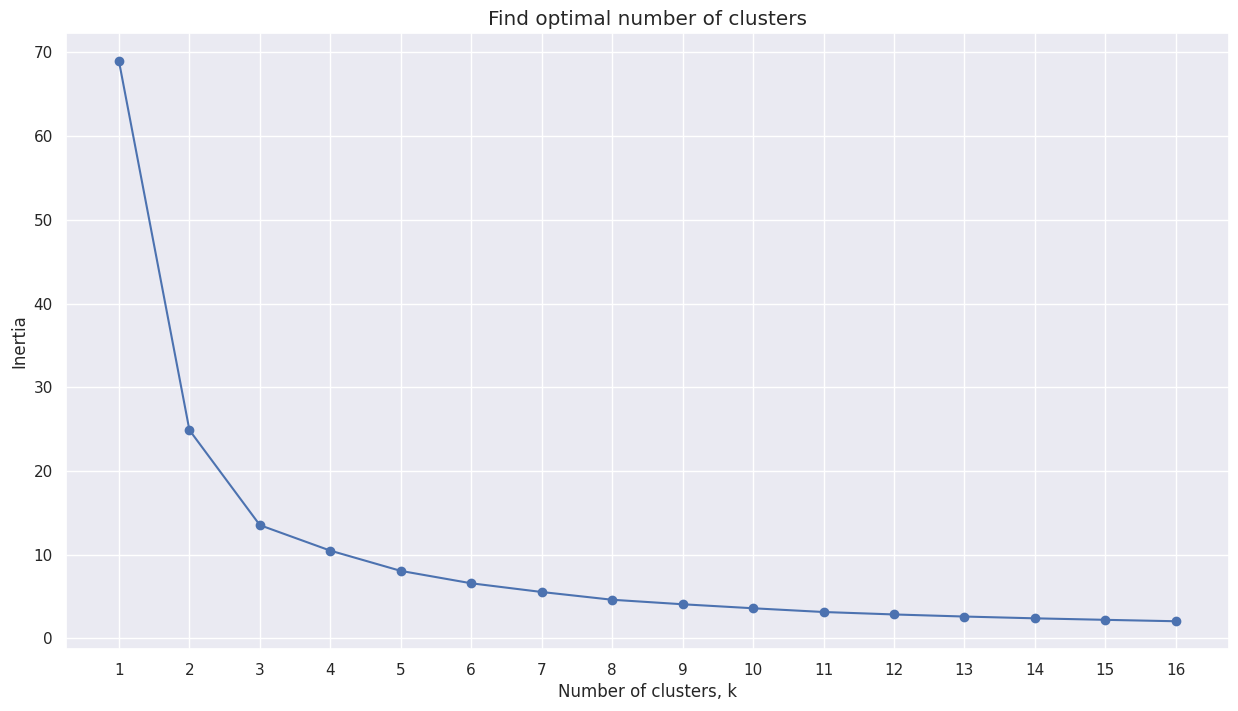

In [37]:
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(np.arange(1,num_clusters,1), ssd, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,num_clusters,1))
plt.style.use('ggplot')
plt.title('Find optimal number of clusters')
plt.show()

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score

# compute the silhouette_score for each value of the hyper-parameter k, and k must be > 1

for n_clusters in range(2,num_clusters):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    kmean = KMeans(n_clusters=n_clusters, random_state=1, max_iter=50, n_init=20)
    cluster_labels = kmean.fit_predict(df_night_train)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_night_train, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.5358745211007442
For n_clusters = 3 The average silhouette_score is : 0.49354812609613735
For n_clusters = 4 The average silhouette_score is : 0.45689102678908916
For n_clusters = 5 The average silhouette_score is : 0.41953882871533454
For n_clusters = 6 The average silhouette_score is : 0.4264490586148567
For n_clusters = 7 The average silhouette_score is : 0.440528740296951
For n_clusters = 8 The average silhouette_score is : 0.454297496584457
For n_clusters = 9 The average silhouette_score is : 0.4509198770596944
For n_clusters = 10 The average silhouette_score is : 0.4660530593129403
For n_clusters = 11 The average silhouette_score is : 0.4512881041065539
For n_clusters = 12 The average silhouette_score is : 0.45631531993872215
For n_clusters = 13 The average silhouette_score is : 0.463220195052408
For n_clusters = 14 The average silhouette_score is : 0.4566808491276091
For n_clusters = 15 The average silhouette_score is : 0.45

### From observing above graph (Elbow Method) and the inspecting the Silhouette scores, we know that when k > 9, the rate of decreasing of the Sum-Squared-Distance (Inertia, which is the sum of squared distance between each data point to its centroid for a cluster) curve becomes very small (elbow of the curve at k = 10), and the Silhouette score (a score closer to 1 indicating that the data point is very similar to the other data points in the same cluster) is relatively high and stable when k = 10 (0.47)

#### Hence, we will use kmean model to categorize the data into 10 clusters and check the most frequent Division for each cluster.

In [39]:
kmean = KMeans(n_clusters = 10, random_state=1, max_iter=50)
df_night['cluster_label'] = kmean.fit_predict(df_night_train)
df_night['cluster_label']

0       8
1       4
3       3
4       8
5       1
       ..
5701    6
5702    1
5703    3
5704    8
5705    0
Name: cluster_label, Length: 4356, dtype: int32

In [40]:
# double check the model performance

from sklearn.metrics import silhouette_samples, silhouette_score
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
silhouette = silhouette_score(df_night_train, df_night['cluster_label'] )
print("For n_clusters = 10, The silhouette_score is :", silhouette)


For n_clusters = 10, The silhouette_score is : 0.4660530593129403


In [41]:
# Get the mode of division for each cluster
night_division_cluster_mapping = df_night.groupby('cluster_label')['DIVISION'].agg(pd.Series.mode)
night_division_cluster_mapping
# no 2 or more modes for the same cluster, which is desirable

cluster_label
0    D13
1    D42
2    D31
3    D51
4    D23
5    D54
6    D12
7    D32
8    D43
9    D22
Name: DIVISION, dtype: object

In [42]:
# check if there are duplicates, must ensure that no division is responsible for 2 clusters
night_division_cluster_mapping.duplicated()

cluster_label
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: DIVISION, dtype: bool

cluster  0 DIVISION
D13    124
D14    104
D11     97
D12     16
D22      5
D53      1
Name: DIVISION, dtype: int64 



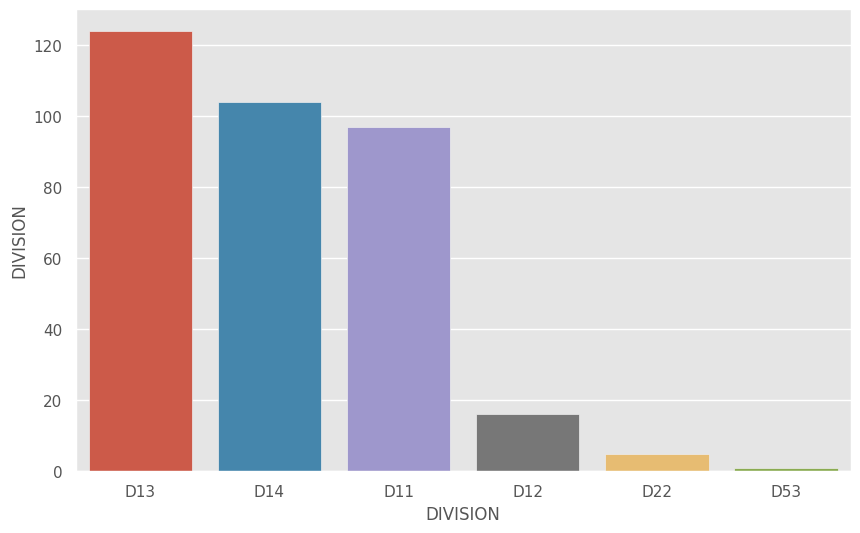

cluster  1 DIVISION
D42    149
D33    100
D41     71
D31      1
D32      1
D51      1
D52      1
Name: DIVISION, dtype: int64 



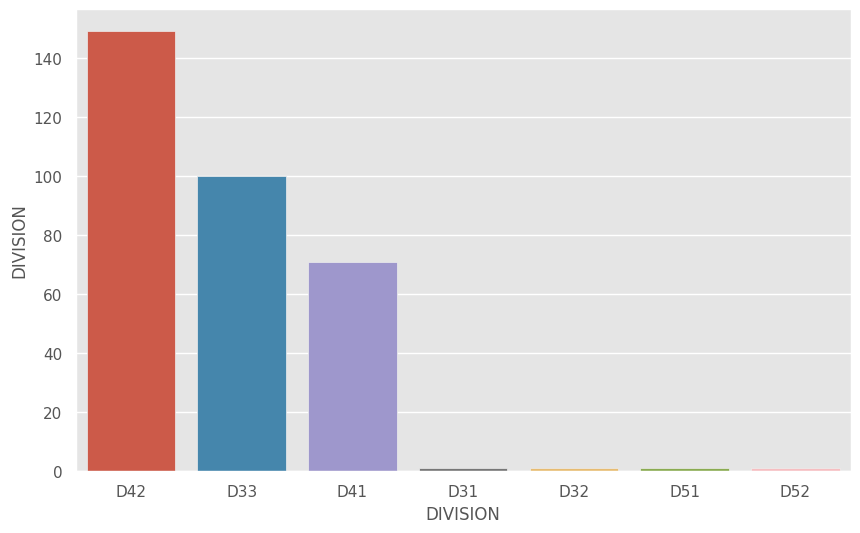

cluster  2 DIVISION
D31    513
D32     13
D23      5
D12      3
D22      1
D41      1
Name: DIVISION, dtype: int64 



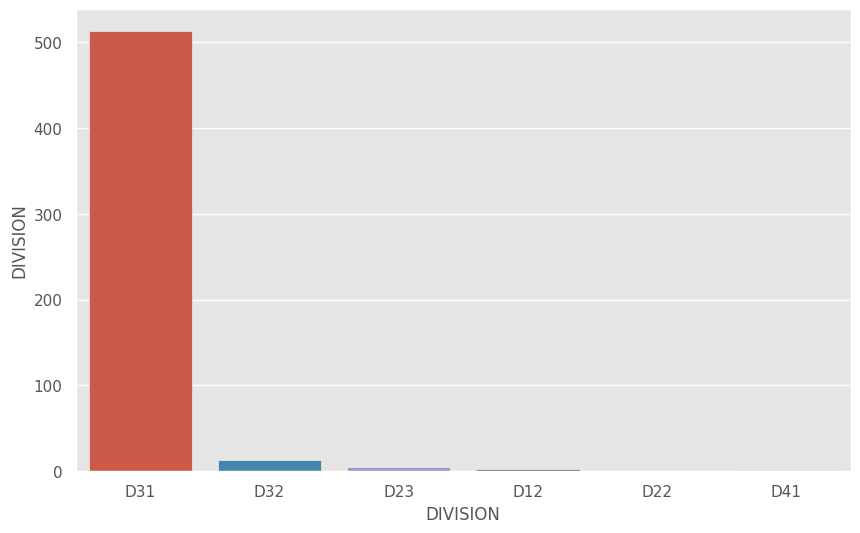

cluster  3 DIVISION
D51    248
D14    149
D52    116
D55     57
D53     26
D54     22
D12      4
D31      4
D42      1
D43      1
Name: DIVISION, dtype: int64 



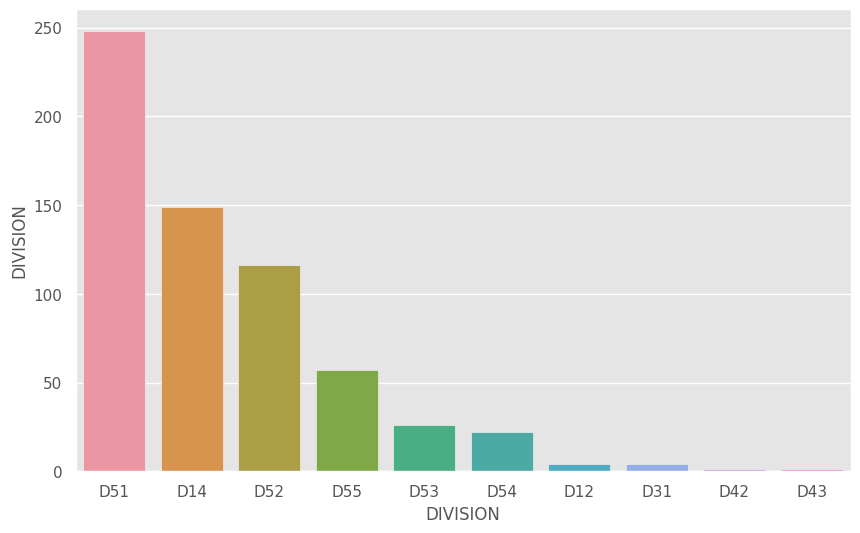

cluster  4 DIVISION
D23    421
D31     95
D12      1
D13      1
D33      1
D43      1
Name: DIVISION, dtype: int64 



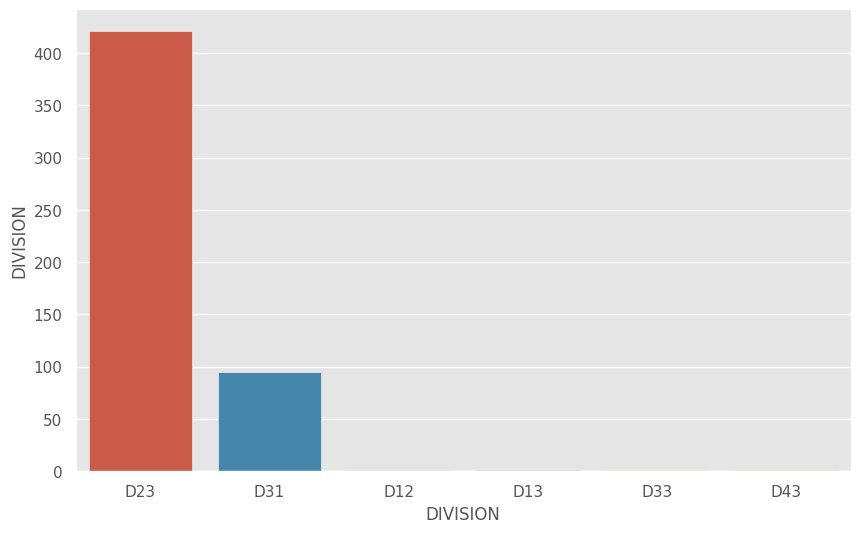

cluster  5 DIVISION
D54    181
D41    145
D55     50
D33     31
D53     31
D43      5
D42      4
D11      2
D31      1
D32      1
D51      1
D52      1
Name: DIVISION, dtype: int64 



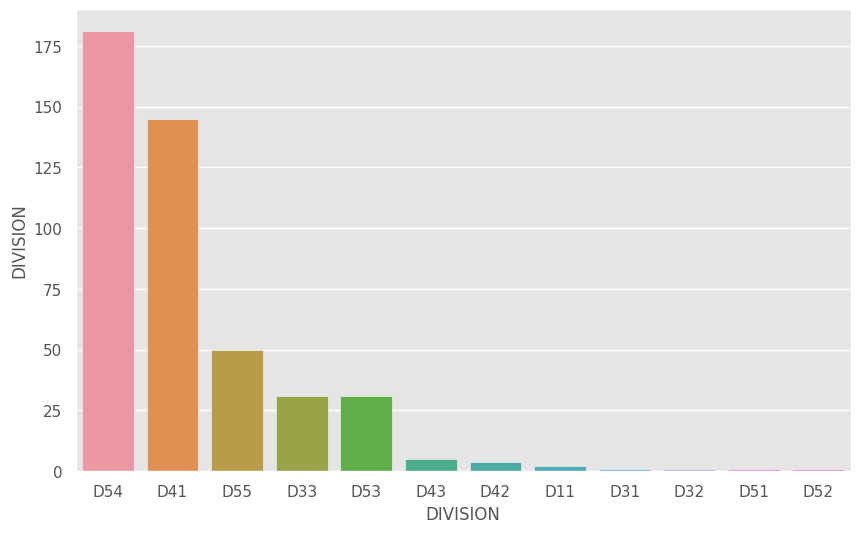

cluster  6 DIVISION
D12    315
D31    115
D23     48
D11     16
D22      6
D13      2
D42      2
D33      1
Name: DIVISION, dtype: int64 



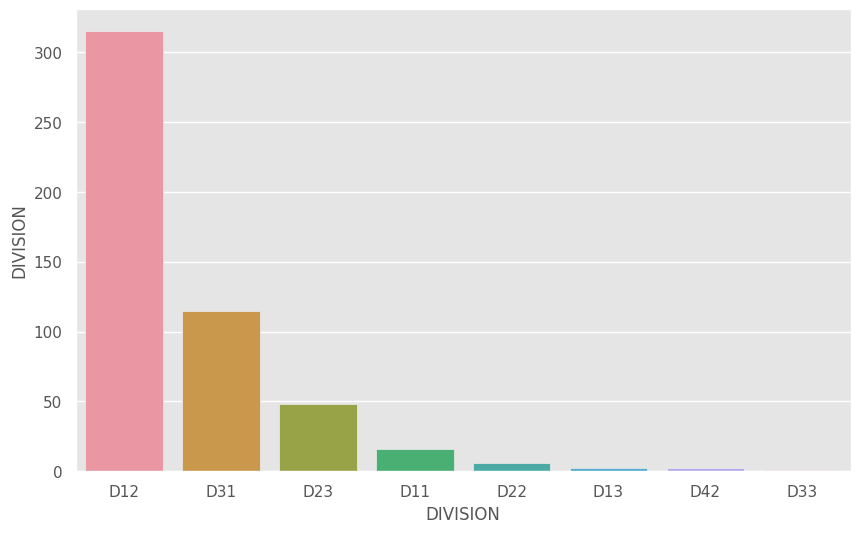

cluster  7 DIVISION
D32    252
D13     18
D53     18
D33      5
D42      1
Name: DIVISION, dtype: int64 



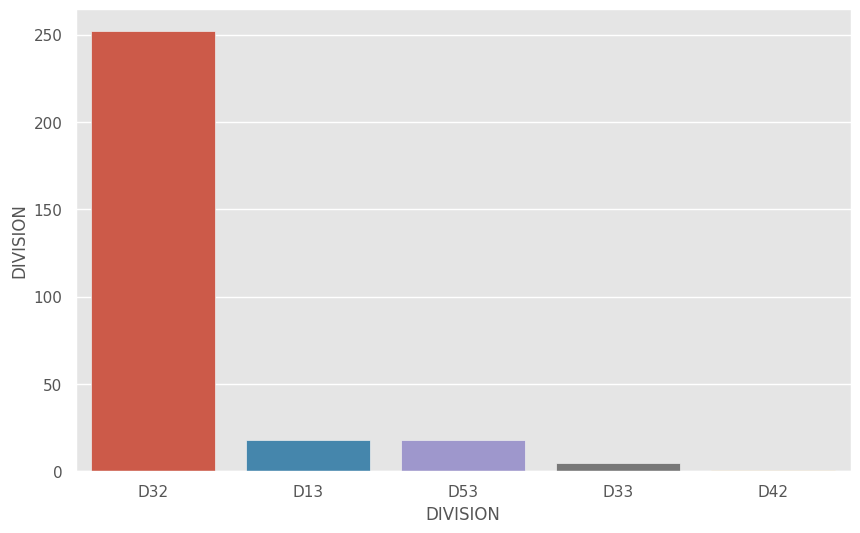

cluster  8 DIVISION
D43    326
D42    215
D41     35
D32      1
D33      1
D51      1
D52      1
D54      1
Name: DIVISION, dtype: int64 



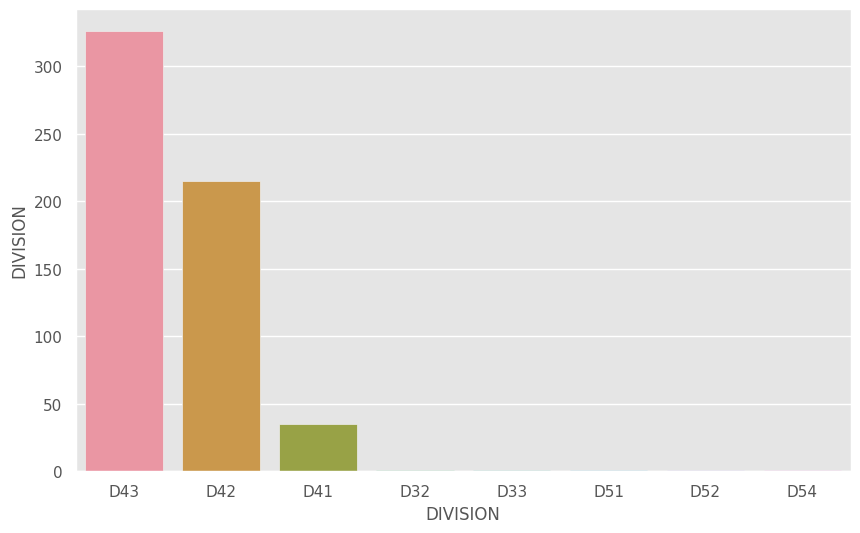

cluster  9 DIVISION
D22    145
D23     23
Name: DIVISION, dtype: int64 



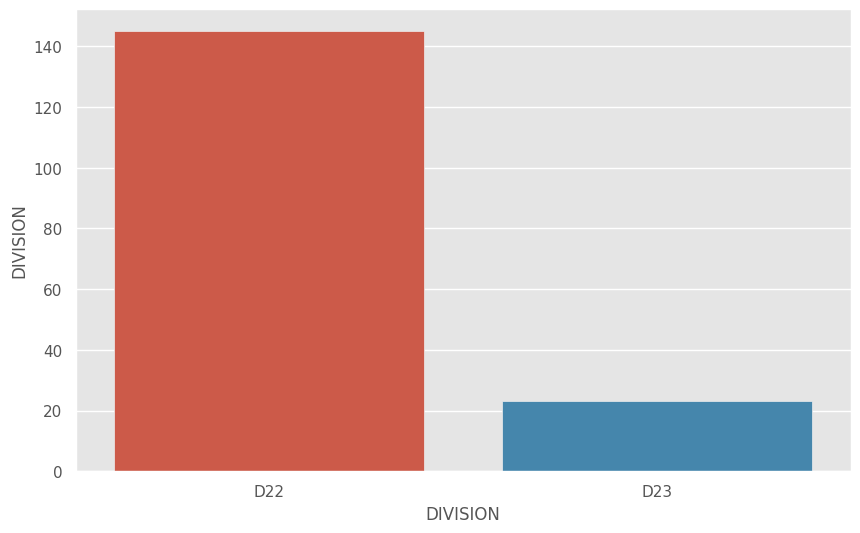

In [43]:
# visualizar the division distribution for each cluster
cluster_result = df_night.groupby('cluster_label')['DIVISION'].agg('value_counts')
for i in range(10):
  print("cluster ", i , cluster_result.loc[i],'\n')
  sns.barplot(x=cluster_result.loc[i].index, y = cluster_result.loc[i], data= cluster_result)
  plt.show()


In [44]:
# Assign Division to each cluster
df_night['assigned_division'] = df_night['cluster_label'].map(night_division_cluster_mapping.to_dict())
df_night['assigned_division']

0       D43
1       D23
3       D51
4       D43
5       D42
       ... 
5701    D12
5702    D42
5703    D51
5704    D43
5705    D13
Name: assigned_division, Length: 4356, dtype: object

Text(0.5, 1.0, 'night incidents')

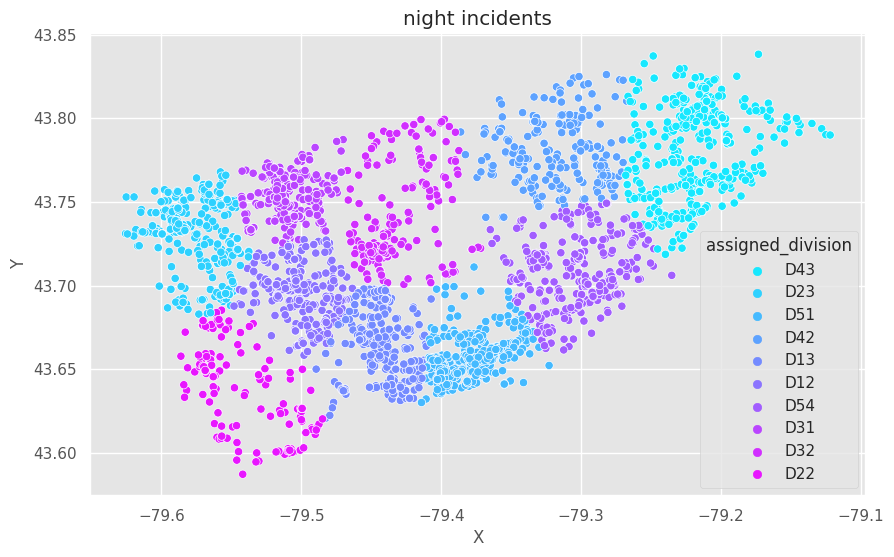

In [45]:
# see the clustering result
sns.scatterplot(x='X',y='Y',hue='assigned_division' ,data=df_night, palette='cool')
plt.title('night incidents')

## Night event division jurisdiction

In [46]:
import folium
from shapely.geometry import MultiPoint
from itertools import cycle

m = folium.Map(location=[df_night['Y'].mean(), df_night['X'].mean()], zoom_start=11)
colors = ['red', 'blue', 'darkcyan', 'purple', 'deeppink', 'darkred',
          'black', 'royalblue', 'darkblue', 'darkgreen', 'cadetblue']

# Group the DataFrame by label
grouped = df_night.groupby('assigned_division')
color_cycle = cycle(colors)

for name, group in grouped:
    # Create a MultiPoint object from the group's coordinates
    multi_point = MultiPoint(group[['X', 'Y']].values)
    color = next(color_cycle)  # Get the next color in the cycle
    # Get the convex hull of the MultiPoint object
    hull = multi_point.convex_hull

    # If the hull is a Polygon, add it to the map
    if hull.geom_type == 'Polygon':
        folium.vector_layers.Polygon(locations=[(lat, lon) for lon, lat in hull.exterior.coords],
                                     color=color,
                                     fill=True,
                                     popup=name).add_to(m)
         # Add a labeled marker at the centroid of the polygon
        centroid = hull.centroid
        folium.Marker(location=[centroid.y, centroid.x],
                      icon=folium.DivIcon(html=f'<div style="font-size: 12pt; color : {color}">{name}</div>')).add_to(m)

    else: # if the hull is a Point or a LineString, plot them as markers or line segments
        if hull.geom_type == 'Point':
            folium.Marker(location=[hull.y, hull.x], popup=name).add_to(m)
        elif hull.geom_type == 'LineString':
            folium.vector_layers.PolyLine(locations=[(lat, lon) for lon, lat in hull.coords],
                                          color=color,
                                          popup=name).add_to(m)

m



## Repeat above step to get the daytime event division jurisdiction

Note: Preferably, night divisions should not appear on the daytime to reduce the stress of each division

In [47]:
df_day_train = df_day[['X','Y']]
df_day_train

,X,Y
2,-79.518759,43.769157
7,-79.588530,43.738688
11,-79.589903,43.738802
13,-79.256513,43.730741
20,-79.373917,43.653962
...,...,...
5687,-79.198740,43.746293
5695,-79.465158,43.705940
5696,-79.255781,43.736698
5697,-79.580198,43.754972


In [48]:
from sklearn.cluster import KMeans
num_clusters = len(df['DIVISION'].unique())

ssd = []
for i in list(range(1,num_clusters)):
    model_clus = KMeans(n_clusters = i,  random_state=1,max_iter=50,n_init=10)
    model_clus.fit(df_day_train)
    ssd.append(model_clus.inertia_)



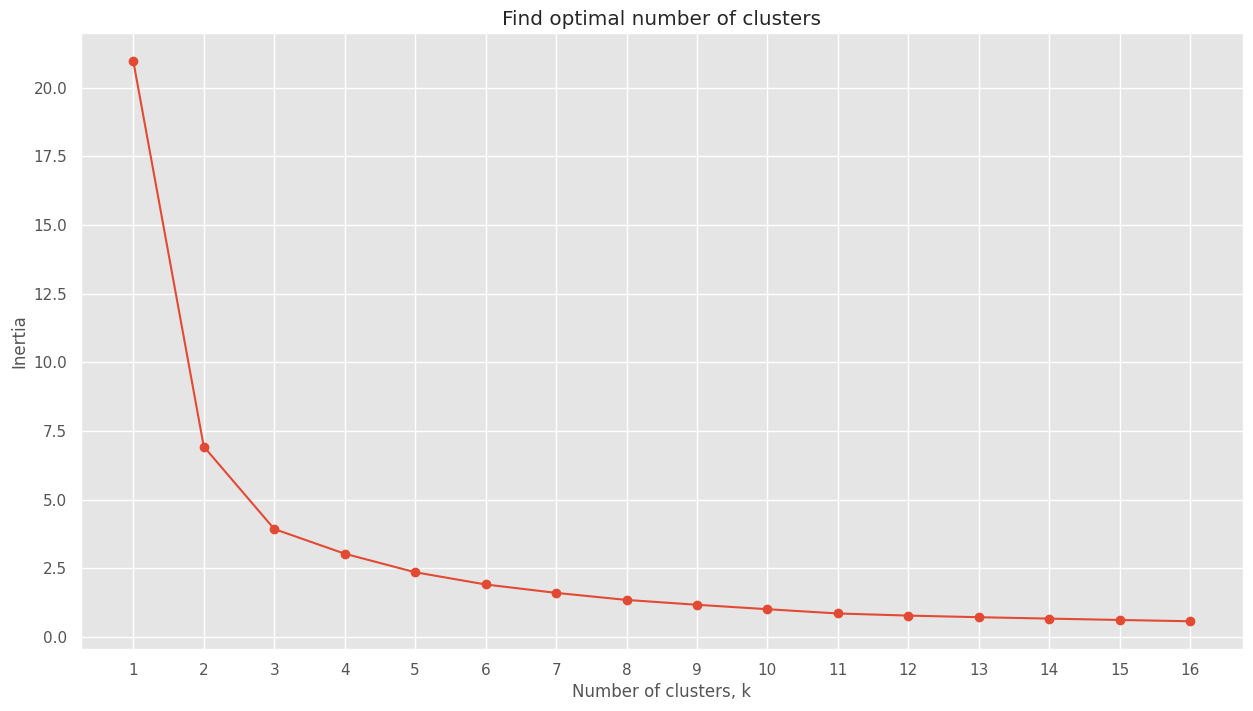

In [49]:
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(np.arange(1,num_clusters,1), ssd, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,num_clusters,1))
plt.style.use('ggplot')
plt.title('Find optimal number of clusters')
plt.show()

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

# compute the silhouette_score for each value of the hyper-parameter k, and k must be > 1

for n_clusters in range(2,num_clusters):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 1 for reproducibility.
    kmean = KMeans(n_clusters=n_clusters, random_state=1, max_iter=50, n_init=20)
    cluster_labels = kmean.fit_predict(df_day_train)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_day_train, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.5688809169906917
For n_clusters = 3 The average silhouette_score is : 0.49603802961624127
For n_clusters = 4 The average silhouette_score is : 0.42960402090851935
For n_clusters = 5 The average silhouette_score is : 0.4193154343910222
For n_clusters = 6 The average silhouette_score is : 0.41778883498725405
For n_clusters = 7 The average silhouette_score is : 0.4329276769654918
For n_clusters = 8 The average silhouette_score is : 0.44589887599014816
For n_clusters = 9 The average silhouette_score is : 0.45412307176780925
For n_clusters = 10 The average silhouette_score is : 0.4750823682119135
For n_clusters = 11 The average silhouette_score is : 0.47041335246490246
For n_clusters = 12 The average silhouette_score is : 0.4712250942379314
For n_clusters = 13 The average silhouette_score is : 0.4676968756173116
For n_clusters = 14 The average silhouette_score is : 0.45586799067595285
For n_clusters = 15 The average silhouette_score is 

### From observing above graph (Elbow Method) and the inspecting the Silhouette scores, we are suprised to see that when k > 9, the rate of decreasing of the Sum-Squared-Distance curve becomes very small (elbow of the curve at k = 10), and the Silhouette score is relatively high and stable when k = 10 (0.48), which is the exact same conclusion with the night time incident clustering

#### Hence, again, we will use kmean model to categorize the data into 10 clusters and check the most frequent Division for each cluster.

In [51]:
kmean = KMeans(n_clusters = 10, random_state=1, max_iter=50)
df_day['cluster_label'] = kmean.fit_predict(df_day_train)
df_day['cluster_label']

2       3
7       2
11      2
13      4
20      8
       ..
5687    7
5695    5
5696    4
5697    2
5706    8
Name: cluster_label, Length: 1287, dtype: int32

In [52]:
# Get the mode of division for each cluster
day_division_cluster_mapping = df_day.groupby('cluster_label')['DIVISION'].agg(pd.Series.mode)
day_division_cluster_mapping
# no 2 or more modes for the same cluster, which is desirable

cluster_label
0    D11
1    D33
2    D23
3    D31
4    D41
5    D32
6    D22
7    D43
8    D51
9    D12
Name: DIVISION, dtype: object

In [53]:
# check if there are duplicates, must ensure that no division is responsible for 2 clusters
day_division_cluster_mapping.duplicated()

cluster_label
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: DIVISION, dtype: bool

cluster  0 DIVISION
D11    34
D14    33
D22     9
D13     8
D12     2
D32     1
D42     1
Name: DIVISION, dtype: int64 



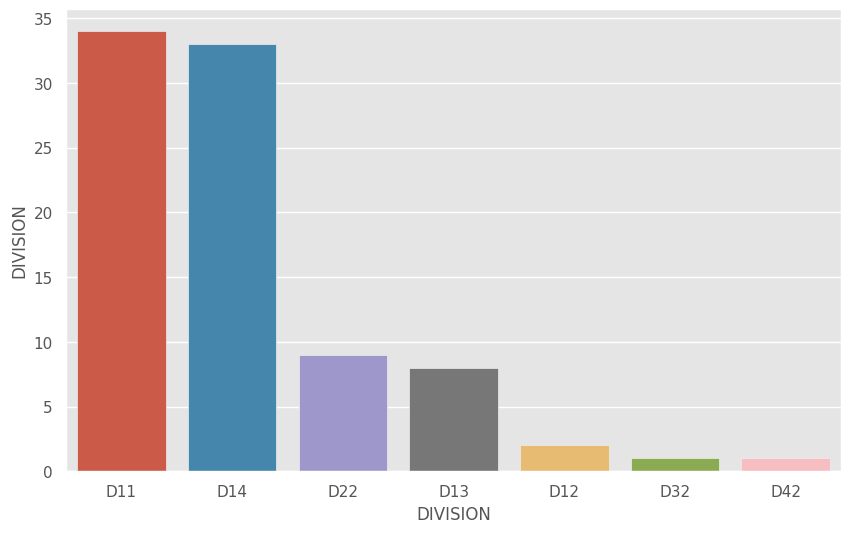

cluster  1 DIVISION
D33    39
D42    29
D41    18
D32     1
Name: DIVISION, dtype: int64 



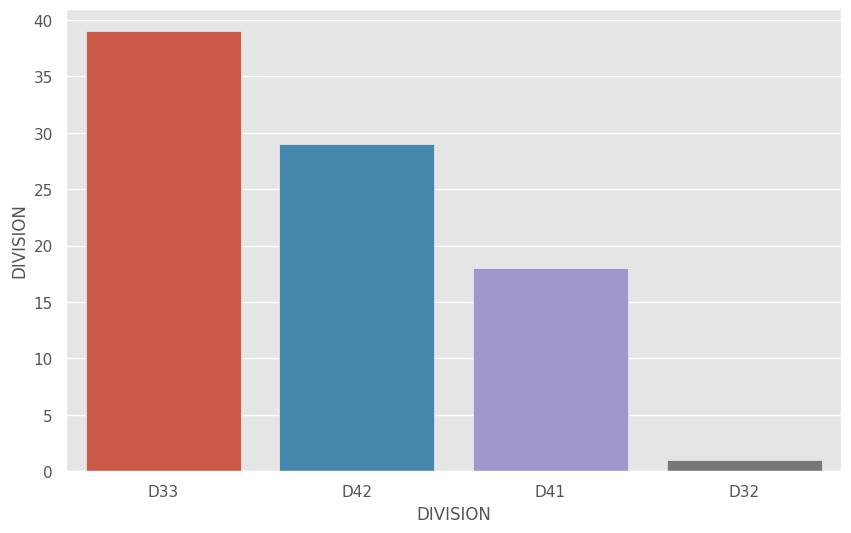

cluster  2 DIVISION
D23    92
D31    41
D22     1
Name: DIVISION, dtype: int64 



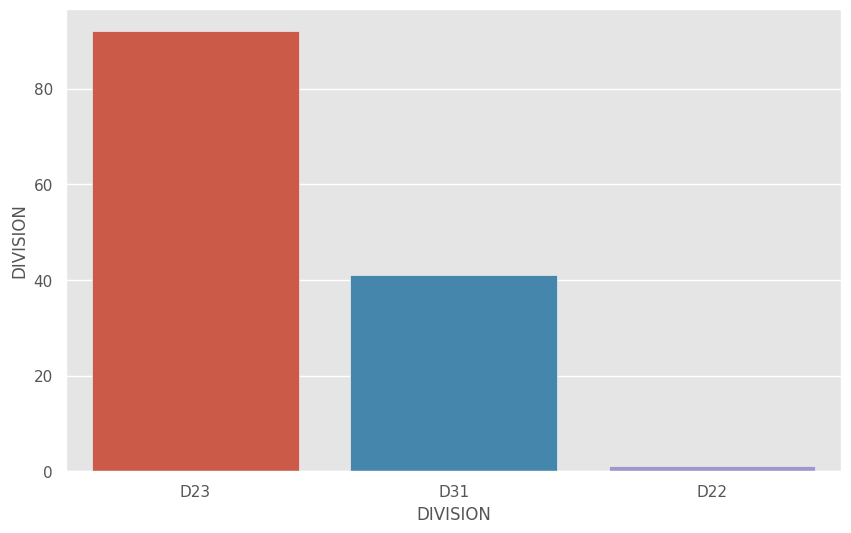

cluster  3 DIVISION
D31    189
D32      5
D13      1
D23      1
Name: DIVISION, dtype: int64 



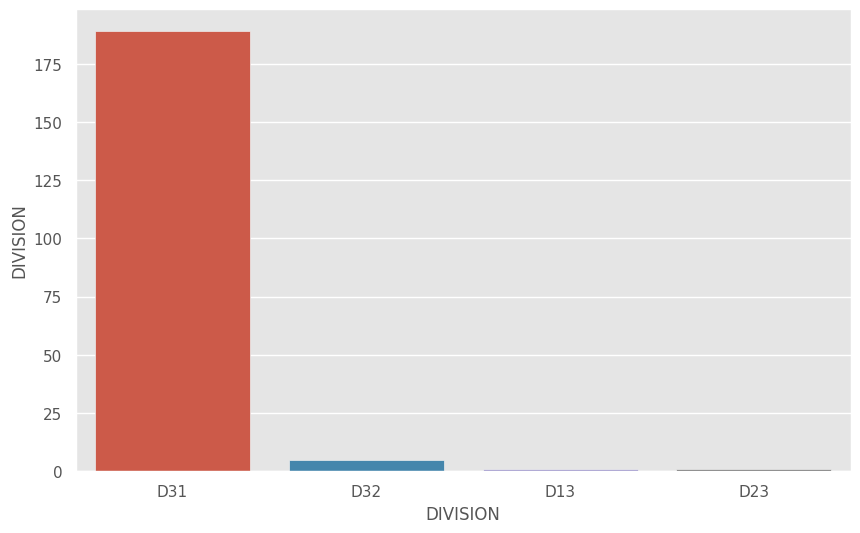

cluster  4 DIVISION
D41    58
D54    40
D55     6
D33     5
D43     3
D51     1
Name: DIVISION, dtype: int64 



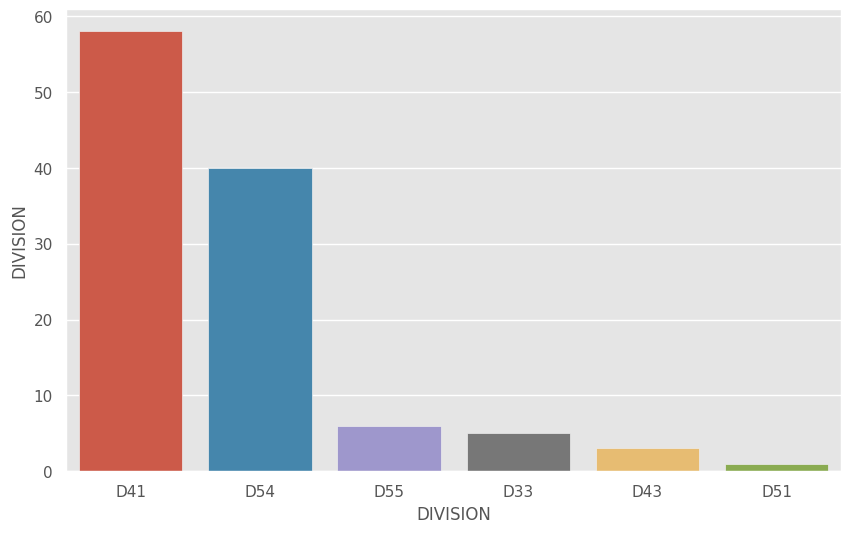

cluster  5 DIVISION
D32    64
D13    34
D12    12
D31    10
D53     2
D23     1
Name: DIVISION, dtype: int64 



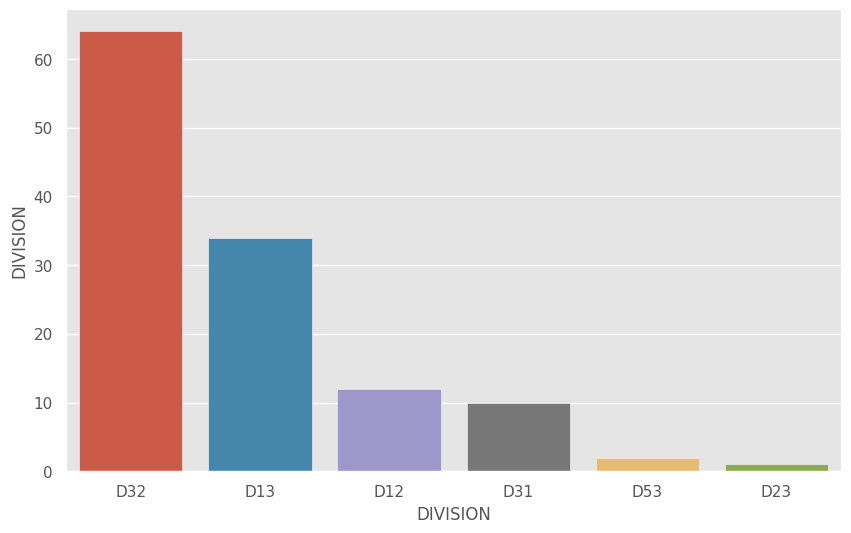

cluster  6 DIVISION
D22    44
D23    11
Name: DIVISION, dtype: int64 



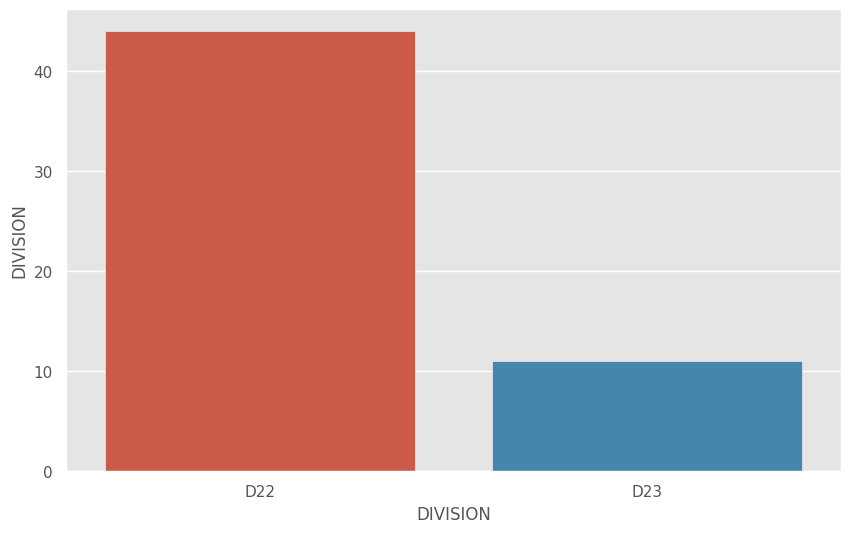

cluster  7 DIVISION
D43    105
D42     68
D41      4
D31      2
Name: DIVISION, dtype: int64 



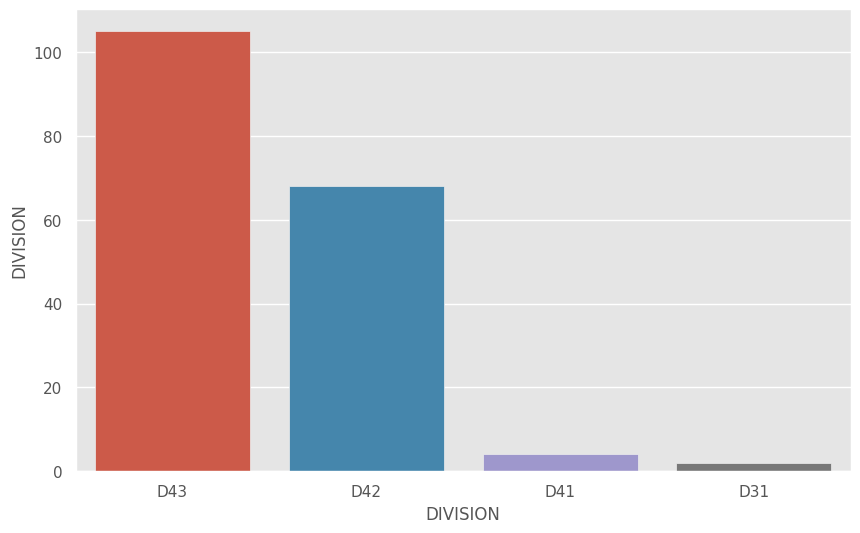

cluster  8 DIVISION
D51    72
D52    23
D14    22
D55    19
D53    14
D54    12
D31     3
D23     1
D32     1
D33     1
Name: DIVISION, dtype: int64 



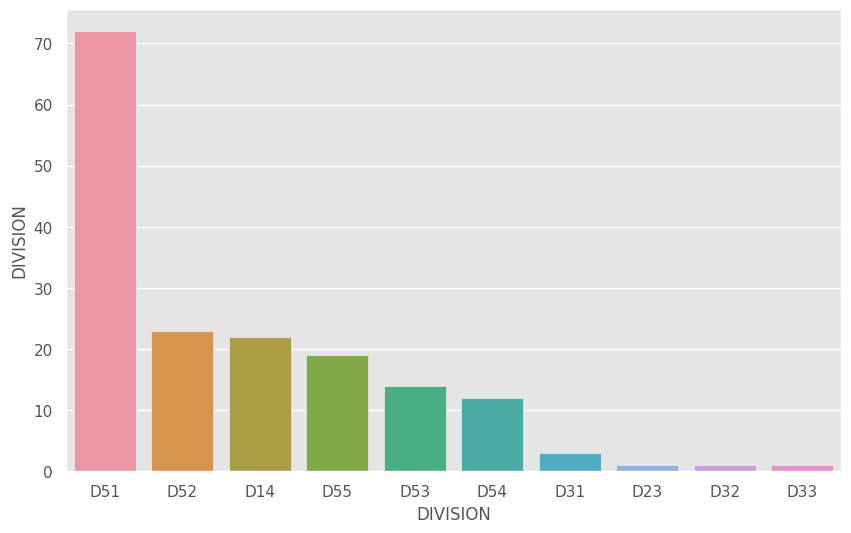

cluster  9 DIVISION
D12    104
D31     18
D23     11
D11      6
D22      3
D32      1
D42      1
Name: DIVISION, dtype: int64 



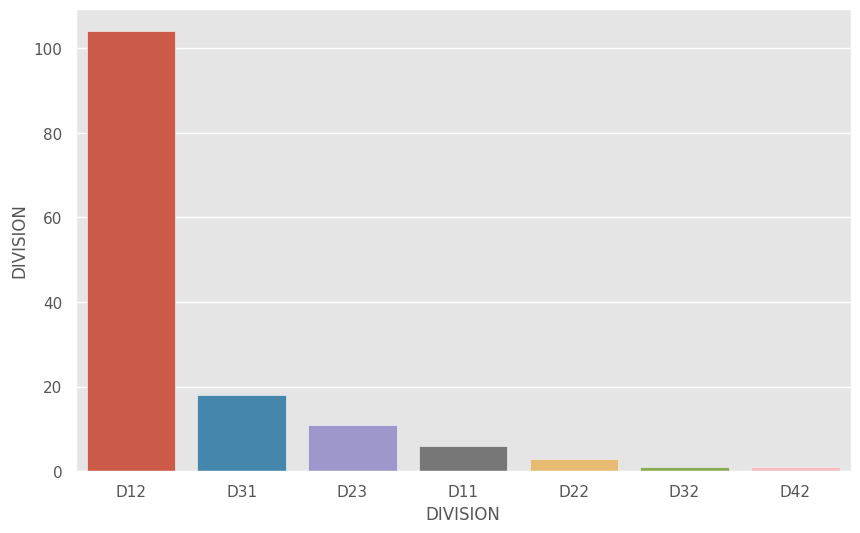

In [54]:
# visualizar the division distribution for each cluster
cluster_result = df_day.groupby('cluster_label')['DIVISION'].agg('value_counts')
for i in range(10):
  print("cluster ", i , cluster_result.loc[i],'\n')
  sns.barplot(x=cluster_result.loc[i].index, y = cluster_result.loc[i], data= cluster_result)
  plt.show()


In [55]:
# Assign Division to each cluster
df_day['assigned_division'] = df_day['cluster_label'].map(day_division_cluster_mapping.to_dict())
df_day['assigned_division']

2       D31
7       D23
11      D23
13      D41
20      D51
       ... 
5687    D43
5695    D32
5696    D41
5697    D23
5706    D51
Name: assigned_division, Length: 1287, dtype: object

Text(0.5, 1.0, 'day incidents')

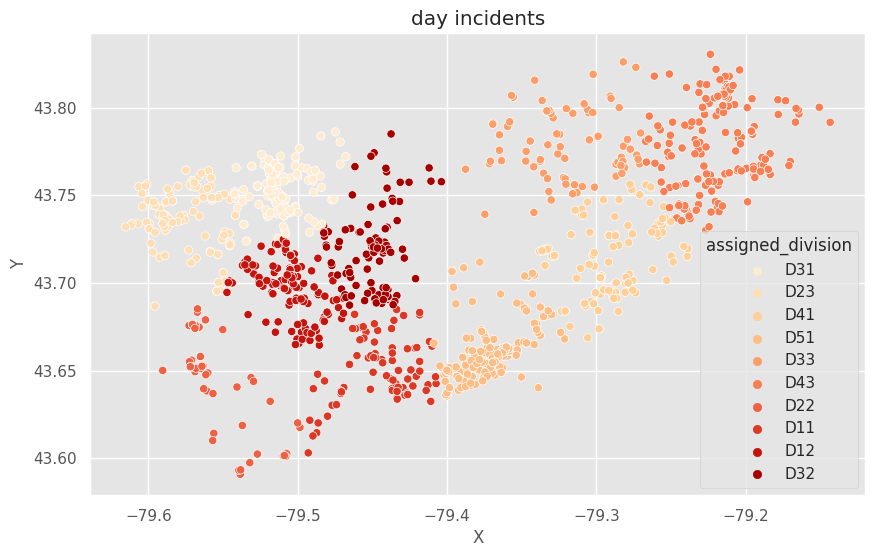

In [56]:
# see the clustering result
sns.scatterplot(x='X',y='Y',hue='assigned_division' ,data=df_day, palette='OrRd')
plt.title('day incidents')

In [57]:

m = folium.Map(location=[df_day['Y'].mean(), df_day['X'].mean()], zoom_start=11)
colors = ['red', 'blue', 'darkcyan', 'purple', 'deeppink', 'darkred',
          'black', 'royalblue', 'darkblue', 'darkgreen', 'cadetblue']

# Group the DataFrame by label
grouped = df_day.groupby('assigned_division')
color_cycle = cycle(colors)

for name, group in grouped:
    # Create a MultiPoint object from the group's coordinates
    multi_point = MultiPoint(group[['X', 'Y']].values)
    color = next(color_cycle)  # Get the next color in the cycle
    # Get the convex hull of the MultiPoint object
    hull = multi_point.convex_hull

    # If the hull is a Polygon, add it to the map
    if hull.geom_type == 'Polygon':
        folium.vector_layers.Polygon(locations=[(lat, lon) for lon, lat in hull.exterior.coords],
                                     color=color,
                                     fill=True,
                                     popup=name).add_to(m)
         # Add a labeled marker at the centroid of the polygon
        centroid = hull.centroid
        folium.Marker(location=[centroid.y, centroid.x],
                      icon=folium.DivIcon(html=f'<div style="font-size: 12pt; color : {color}">{name}</div>')).add_to(m)

    else: # if the hull is a Point or a LineString, plot them as markers or line segments
        if hull.geom_type == 'Point':
            folium.Marker(location=[hull.y, hull.x], popup=name).add_to(m)
        elif hull.geom_type == 'LineString':
            folium.vector_layers.PolyLine(locations=[(lat, lon) for lon, lat in hull.coords],
                                          color=color,
                                          popup=name).add_to(m)

m



As we can seen from above, the daytime clustering result is less condense as night time clustering, implying that the regions that are not covered by any division can be less focused on as those regions have historically been 'SFD-free' (but this does not mean those regions do not need patrol at all, but the frequency and intensity of patrol for those regions can be relatively less comparing to other regions highlighted)

In addition, for the divisions that are assigned to both night and day clusters, they must be allocated sufficient amount of funds and manpower to patrol periodically as those divisions are essential for the regional security and safety. This means that the budgets and manpowers of the divisions that are not assigned to either of day or night clusters can be correspondingly reduced

# Below are divisions that need more manpower and budgets

In [58]:
for i in night_division_cluster_mapping.to_list():
  if i in day_division_cluster_mapping.to_list():
    print(i)

D31
D51
D23
D12
D32
D43
D22


# Below are divisions that can be 'optimized' or restructured to boost the overall police division operation efficiency

In [59]:
for i in df['DIVISION'].unique():
  if i not in night_division_cluster_mapping.to_list() + day_division_cluster_mapping.to_list():
    print(i)

D14
D52
D55
D53


# Try another clustering model to see if a better clustering result can be achieved or not

 > Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

num_clusters = len(df['DIVISION'].unique())


best_n_clusters = None
best_silhouette = -1

for n_clusters in range(2, num_clusters):
    # Perform Spectral Clustering
    clustering = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=1).fit(df_night_train)

    # Compute the silhouette score
    silhouette = silhouette_score(df_night_train, clustering.labels_)

    print(f"For n_clusters = {n_clusters}, silhouette score is {silhouette}")

    # Update the best parameters if this score is better
    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_n_clusters = n_clusters

print(f"The optimal number of clusters, based on silhouette score, is {best_n_clusters}.")




For n_clusters = 2, silhouette score is 0.5331476026460312
For n_clusters = 3, silhouette score is 0.444528033469475
For n_clusters = 4, silhouette score is 0.33921824580586746
For n_clusters = 5, silhouette score is 0.3071028605278935
For n_clusters = 6, silhouette score is 0.2902155174018957
For n_clusters = 7, silhouette score is 0.20480388869298072
For n_clusters = 8, silhouette score is 0.1918115314360118
For n_clusters = 9, silhouette score is 0.17899858818058415
For n_clusters = 10, silhouette score is 0.17533593433584937
For n_clusters = 11, silhouette score is 0.17212187505898308
For n_clusters = 12, silhouette score is 0.14642462918819518
For n_clusters = 13, silhouette score is 0.15828166922492387
For n_clusters = 14, silhouette score is 0.15579156854007997
For n_clusters = 15, silhouette score is 0.12585654819021008
For n_clusters = 16, silhouette score is 0.15066233194835862
The optimal number of clusters, based on silhouette score, is 2.


As shown above, the silhouette score is continuously decreasing as the number of clusters increases, the spectral clustering model is unlikely to give useful result like Kmean can yield as its silhouette score is less than 0.44 when the number of cluster is greater than than 3,  meaning that the spectral clustering performance is worse than Kmean once the number of clutsers is larger than 3. Since it is not sensible to only have 3 divisions to focus on 3 large regions, the result produced by spectral clustering can be disregarded

#### On the other hand, this implies that though being a simple and computationally cheap algorithm, Kmean can yield better results than the sophisticated and comptationally expensive models depending on our business context and objectives

In [ ]:
# test 10 clusters using SpectralClustering
spectral = SpectralClustering(n_clusters = 10, random_state=3)
df_night['spectral_label'] = spectral.fit_predict(df_night_train)
df_night['spectral_label']

0       8
1       1
3       0
4       8
5       5
       ..
5701    5
5702    8
5703    0
5704    4
5705    0
Name: spectral_label, Length: 4356, dtype: int32

In [ ]:
spectral_division_cluster_mapping = df_night.groupby('spectral_label')['DIVISION'].agg(pd.Series.mode)
spectral_division_cluster_mapping

spectral_label
0    D51
1    D31
2    D32
3    D32
4    D43
5    D12
6    D53
7    D32
8    D42
9    D22
Name: DIVISION, dtype: object

In [ ]:
spectral_division_cluster_mapping.duplicated()

spectral_label
0    False
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9    False
Name: DIVISION, dtype: bool

In [ ]:
# Assign Division to each cluster
df_night['spctral_assigned_division'] = df_night['spectral_label'].map(spectral_division_cluster_mapping.to_dict())
df_night['spctral_assigned_division']

0       D42
1       D31
3       D51
4       D42
5       D12
       ... 
5701    D12
5702    D42
5703    D51
5704    D43
5705    D51
Name: spctral_assigned_division, Length: 4356, dtype: object

In [ ]:
# visualizar the division distribution for each cluster
cluster_result = df_night.groupby('spectral_label')['DIVISION'].agg('value_counts')
for i in range(9):
  print("cluster ", i , cluster_result.loc[i],'\n')
  #sns.barplot(x=cluster_result.loc[i].index, y = cluster_result.loc[i], data= cluster_result)
  plt.show()

cluster  0 DIVISION
D51    247
D14    241
D52    116
D55     94
D11     34
D54     24
D53     13
D12      4
D31      4
D42      1
D43      1
Name: DIVISION, dtype: int64 

cluster  1 DIVISION
D31    559
D23    337
D32     17
D12      4
D13      1
D22      1
D41      1
D43      1
Name: DIVISION, dtype: int64 

cluster  2 DIVISION
D32    1
Name: DIVISION, dtype: int64 

cluster  3 DIVISION
D32    1
Name: DIVISION, dtype: int64 

cluster  4 DIVISION
D43    317
D41    180
D54     91
D42     21
D55     13
D33      3
D11      2
D32      2
D52      2
D31      1
Name: DIVISION, dtype: int64 

cluster  5 DIVISION
D12    329
D32    197
D31    163
D13    144
D54     88
D23     65
D53     62
D33     60
D11     46
D41     26
D14     12
D22      4
D42      3
D51      2
Name: DIVISION, dtype: int64 

cluster  6 DIVISION
D53    1
Name: DIVISION, dtype: int64 

cluster  7 DIVISION
D32    1
Name: DIVISION, dtype: int64 

cluster  8 DIVISION
D42    347
D33     75
D32     49
D41     45
D43     14
D51     

As shown above and below, bad clustering result using spectral clustering due to the existence of single-instance clutsers

Text(0.5, 1.0, 'night incidents')

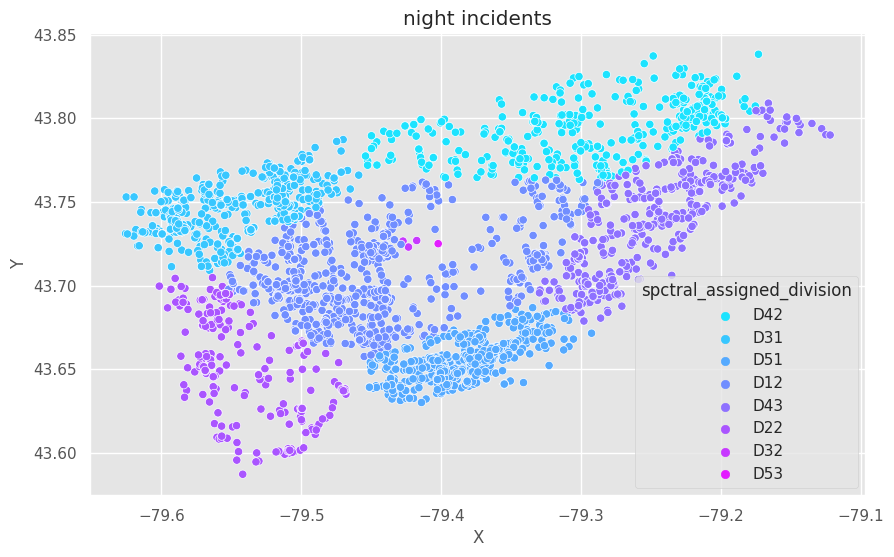

In [ ]:
# see the clustering result
sns.scatterplot(x='X',y='Y',hue='spctral_assigned_division' ,data=df_night, palette='cool')
plt.title('night incidents')

# Below are failed attempts to use DBScan, which performs poorly for this task without lengthy hyper-parameter tuning

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.01, min_samples=3)
df_night['dbscan_label'] = db.fit_predict(df_night_train)
df_night['dbscan_label']

0       0
1       0
3       0
4       0
5       0
       ..
5701    0
5702    3
5703    0
5704    0
5705    0
Name: dbscan_label, Length: 4356, dtype: int64

In [ ]:
df_night['dbscan_label'].unique()

array([ 0,  1,  2,  3, -1,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
core_samples_mask = df_night['dbscan_label'] != -1
X_core = df_night_train.loc[core_samples_mask]
labels_core = df_night['dbscan_label'].loc[core_samples_mask]

# Compute the silhouette score
silhouette_score(X_core, labels_core)

-0.48699188060500975

Text(0.5, 1.0, 'night incidents')

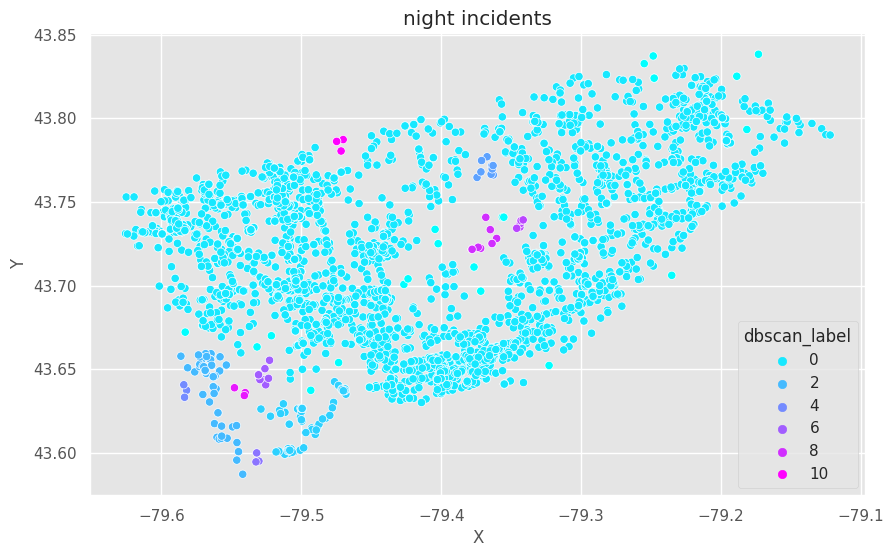

In [ ]:
sns.scatterplot(x='X',y='Y',hue='dbscan_label' ,data=df_night, palette='cool')
plt.title('night incidents')